<a href="https://colab.research.google.com/github/Outlier165/rnn-infant-demo/blob/main/%E2%80%9CUntitled0_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 安装依赖（Colab 中运行）
!pip install -q torch torchvision torchaudio librosa scikit-learn matplotlib seaborn opencv-python tqdm
# 检查版本（可选）
!python -c "import torch, librosa, sklearn; print('torch', torch.__version__, 'librosa', librosa.__version__)"

torch 2.9.0+cu126 librosa 0.11.0


In [ ]:
# Imports and device
import os, glob, random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa, librosa.display
import torch
from IPython.display import Audio, display

sns.set()
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', DEVICE)

Device: cpu


In [ ]:
# Clone a tiny demo dataset (Free Spoken Digit Dataset)
!git clone --depth 1 https://github.com/Jakobovski/free-spoken-digit-dataset.git fsdd >/dev/null 2>&1 || true
!ls -l fsdd/recordings | sed -n '1,10p'

total 26704
-rw-r--r-- 1 root root  4812 Dec  4 01:40 0_george_0.wav
-rw-r--r-- 1 root root 11960 Dec  4 01:40 0_george_10.wav
-rw-r--r-- 1 root root  7366 Dec  4 01:40 0_george_11.wav
-rw-r--r-- 1 root root  8144 Dec  4 01:40 0_george_12.wav
-rw-r--r-- 1 root root  8742 Dec  4 01:40 0_george_13.wav
-rw-r--r-- 1 root root  8652 Dec  4 01:40 0_george_14.wav
-rw-r--r-- 1 root root  8416 Dec  4 01:40 0_george_15.wav
-rw-r--r-- 1 root root 10152 Dec  4 01:40 0_george_16.wav
-rw-r--r-- 1 root root  9392 Dec  4 01:40 0_george_17.wav


Found 3000 wav files
Example path: fsdd/recordings/2_nicolas_5.wav
wav shape: (1475,) sr: 8000


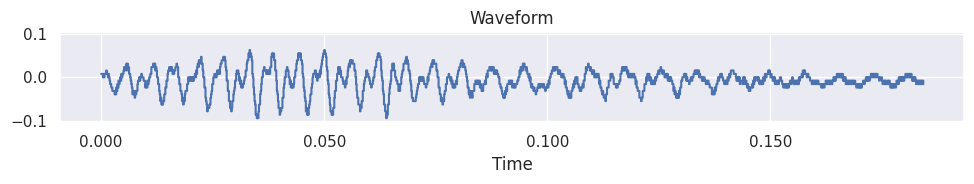

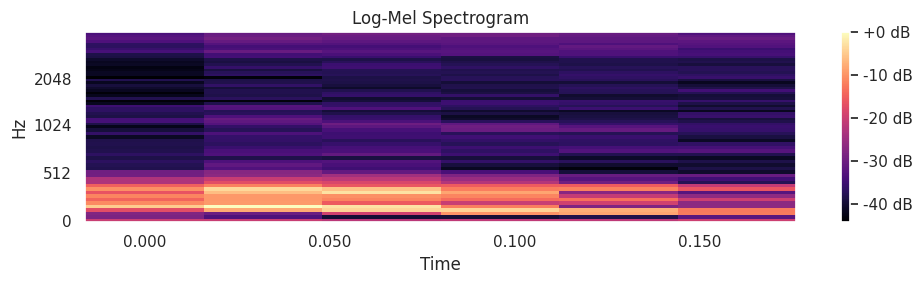

In [ ]:
DATA_DIR = 'fsdd/recordings'
wav_files = glob.glob(os.path.join(DATA_DIR, '*.wav'))
print('Found', len(wav_files), 'wav files')
example = wav_files[0]
print('Example path:', example)

SR = 8000  # FSDD uses 8kHz; change to 16000 if your audio is 16kHz
wav, sr = librosa.load(example, sr=SR, mono=True)
print('wav shape:', wav.shape, 'sr:', sr)

# Play audio
display(Audio(wav, rate=sr))

# Waveform
plt.figure(figsize=(10,2))
librosa.display.waveshow(wav, sr=sr)
plt.title('Waveform')
plt.tight_layout()
plt.show()

# Log-mel spectrogram
n_fft = 1024
hop_length = 256
n_mels = 64
S = librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_db = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(10,3))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
# 如果你想用自己的音频（更真实），把文件上传到 Google Drive 然后挂载：
from google.colab import drive
drive.mount('/content/drive')
# 例：把 DATA_DIR 指向你的 Drive 中的文件夹
# DATA_DIR = '/content/drive/MyDrive/your_audio_folder'

Mounted at /content/drive


In [ ]:
# 保存当前绘图（示例 log-mel）为 PNG，便于下载并上传到 GitHub
out_png = 'logmel_example.png'
plt.figure(figsize=(10,3))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram')
plt.tight_layout()
plt.savefig(out_png, dpi=150)
plt.close()
print('Saved', out_png)

Saved logmel_example.png
